# HW 6
## James Camacho

We need to solve the BVP
$$\theta''(t) = -\sin(\theta(t)), \theta(0)=\alpha, \theta(T)=\beta.$$

We discretize it as follows:
$$\theta''(t_i)\approx \frac{1}{h^2}\left[\theta_{i-1}-2\theta_i+\theta_{i+1}\right]$$
where $h=T/N$, so the problem becomes
.
$$\frac{1}{h^2}\left[\theta_{i-1}-2\theta_i+\theta_{i+1}\right] + \sin\theta_i = 0.$$

except on the boundaries where it is simply $\theta_0 = \alpha, \theta_{N} = \beta$. We can solve this using Newton's method. Let $G : \mathbb{R}^{N+1}\to\mathbb{R}^{N-1}$ be this function on the LHS, i.e. we want $G(\theta) = 0$. From the Taylor series expansion, we have

$$G(\theta + \delta)\approx G(\theta) + \delta G'(\theta)$$

so if we add $\delta = -\frac{G(\theta)}{G'(\theta)}$ it will become approximately zero. This gives us Newton's method. We start with an initial $\theta^0$, and each update is given by

$$\theta^{k+1} = \theta^k - \frac{G(\theta^k)}{G'(\theta^k)}.$$

Of course, $\theta$ is multidimensional, so we use the inverse of the Jacobian rather than dividing by $G'$. The inverse of the Jacobian is rather slow to compute, so many times people use a *quasi*-Newton method where they approximate the inverse (e.g. Broyden's Bad Method).

In [146]:
import numpy as np
import matplotlib.pyplot as plt

def Jacobian(theta, h):
    n = len(theta)
    J = np.zeros((n, n))
    
    # Bdry cond. (Dirichlet)
    J[0, 0] = 1
    J[-1, -1] = 1
    
    # Interior points
    for i in range(1, n-1):
        J[i, i] = -2/h**2 + np.cos(theta[i])
        J[i, i-1] = J[i, i+1] = 1/h**2
    return J

def G(theta, h):
    n = len(theta)
    g = np.zeros(n)
    # Bdry are zero, because it should be the exact solution already.
    # Interior points
    for i in range(1, n-1):
        g[i] = (theta[i-1]-2*theta[i]+theta[i+1])/h**2 + np.sin(theta[i])
    return g

def Newton(alpha, beta, T, N, theta=None, maxiters=10, error=1e-10):
    """
    alpha - Start position. Angle zero is straight downwards, np.pi is straight to the right.
    beta - End position.
    T - Time (seconds).
    N - Number of points to discretize the time interval into.
    theta - Initial theta guess.
    maxiters - Maximum number of iterations of Newton's method.
    """
    if theta is None:
        theta = np.zeros(N+1)
    
    theta[0] = alpha
    theta[N] = beta
    
    h = T/N
    
    for i in range(maxiters):
        Jm = Jacobian(theta, h)
        Gb = G(theta, h)
        delta = np.linalg.solve(Jm, Gb)
        
        if(np.linalg.norm(delta) <= np.linalg.norm(theta) * error):
            break
        
        theta -= delta
        theta[0] = alpha
        theta[N] = beta
            
    print(f"Took {i} iterations.")
        
    return theta

Took 0 iterations.


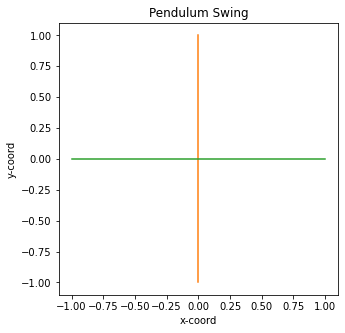

In [157]:
# Example where it begins and ends at zero. Gives all zero vector.
alpha = 0
beta = 0
T = 4
N = 100
points = Newton(alpha, beta, T, N)

plt.figure(figsize=(5,5))
plt.plot(np.sin(points), -np.cos(points))
plt.plot((0,0), (-1,1))
plt.plot((-1,1), (0,0))
plt.title("Pendulum Swing")
plt.xlabel("x-coord")
plt.ylabel("y-coord")
plt.show();

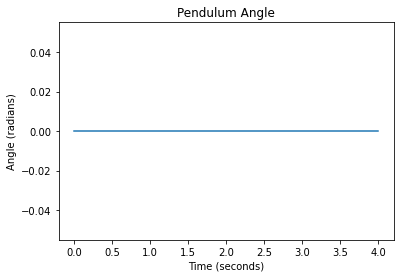

In [158]:
plt.plot(np.linspace(0, T, N+1), points)
plt.title("Pendulum Angle")
plt.xlabel("Time (seconds)")
plt.ylabel("Angle (radians)")
plt.show();

Took 6 iterations.


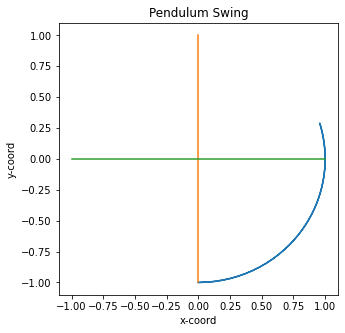

In [161]:
# Example where it begins and ends at zero, but we give an initial guess of theta = pi.
# We expect it to go up and then back down.
alpha = 0
beta = 0
T = 4
N = 100
points = Newton(alpha, beta, T, N, theta=np.full(N+1,np.pi))

plt.figure(figsize=(5,5))
plt.plot(np.sin(points), -np.cos(points))
plt.plot((0,0), (-1,1))
plt.plot((-1,1), (0,0))
plt.title("Pendulum Swing")
plt.xlabel("x-coord")
plt.ylabel("y-coord")
plt.show();

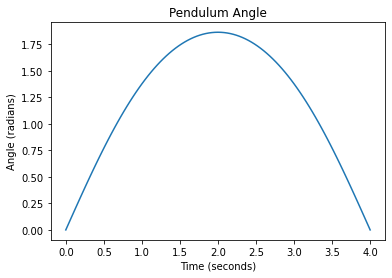

In [162]:
plt.plot(np.linspace(0, T, N+1), points)
plt.title("Pendulum Angle")
plt.xlabel("Time (seconds)")
plt.ylabel("Angle (radians)")
plt.show();